In [1]:
import numpy as np
import matplotlib.pyplot as plt

dx =  0.01 dt =  0.0001 v =  63.245553203367585  m/s


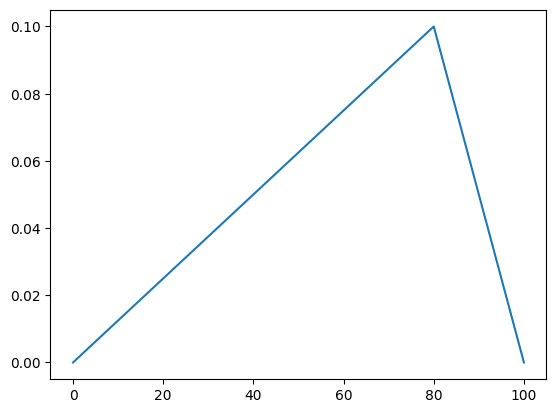

In [5]:
rho = 0.01             # string density [kg/m]
T = 40.                # string tension [N]
L = 1.0                # string length [m]
v = np.sqrt(T/rho)     # wave speed [m/s]

N = 100                # space grid dimension
a = L/N                # space grid interval
h = 1e-4               # time grid interval

c = v**2*h**2/a**2.    # handy coeff for leap frog method

y = np.zeros( (N+1), float)  # future Y(t)
y1 = np.zeros( (N+1), float) # current Y(t)
y2 = np.zeros( (N+1), float) # previous Y(t)

for i in range(0, 81):
        y1[i] = 0.00125*i                # initial pluck - 1st part of y1
for i in range (81, 101):
        y1[i] = 0.1 - 0.005*(i - 80)     # initial pluck - 2nd part of y1

print("dx = ", a, "dt = ", h, "v = ", v," m/s")
plt.plot(y1)


Text(0, 0.5, 'displacement, Y')

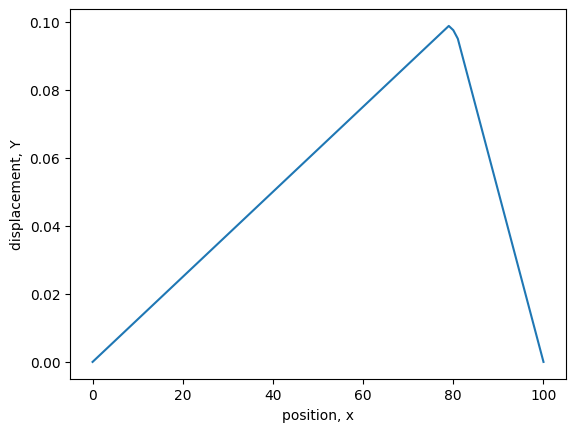

In [6]:
for i in range(1, N): # first step eqn, incorporating dY/dt = 0
    y[i] = y1[i] + c*(y1[i+1] - 2*y1[i] + y1[i-1]) # notice y[i] = y1[i] +

y[0] = 0.0 # LH boundary condition
y[N] = 0.0 # RH boundary condition
y2[:], y1[:] = y1, y # shift variables for next step

plt.plot(y)
plt.xlabel("position, x")
plt.ylabel("displacement, Y")

Text(0, 0.5, 'displacement, Y')

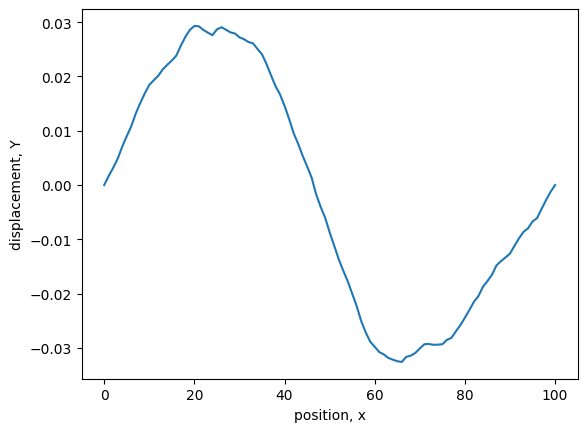

In [29]:
t = 0.0 # time counter
Nt = 1000 # number of time steps

for it in range(1,Nt):
    for i in range(1,N):
        y[i] = 2*y1[i] - y2[i] + c*(y1[i+1] - 2*y1[i] + y1[i-1]) # notice  = 2*y1[i] - y2[i] +
    y[0] = 0.0 # LH boundary condition
    y[N] = 0.0 # RH boundary condition
    y2[:], y1[:] = y1, y # shift variables for next step
    t += h

plt.plot(y)
plt.xlabel("position, x")
plt.ylabel("displacement, Y")